<a href="https://colab.research.google.com/github/were007/Autolib-Blue-Cars/blob/main/Autolib_Blue_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Hypothesis Testing for Autolib car in Paris France.

## PROBLEM STATEMENT.
Carry out Null and Alternative hypothesis from the Autolib Car sharing dataset.


### The Dataset can be found in the link below: 

url [https://bit.ly/DSCoreAutolibDataset]

   


## Importing Essential Libraries

In [118]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import os,sys
from scipy import stats
##


# 2.0 **DATA EXPLORATION**

In [122]:
# reading in data
url = 'http://bit.ly/DSCoreAutolibDataset'
df = pd.read_csv(url)
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [123]:
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


### 2.1 Checking the data

In [124]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [125]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [126]:
# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(df1.shape)

# Printing the shape of our old dataset
# ---
#
print(df.shape)

(9783, 13)
(16085, 13)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



In [127]:
# determining the number of records in the dataset
df.shape

(16085, 13)

In [128]:
# checking for duplicates
df1.duplicated().any()

False

In [129]:
# checking for missing values
df1.isnull().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

In [130]:
df1.isnull().sum().sort_values(ascending=False)

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [131]:
df1.nunique()

Postal code                79
date                      130
n_daily_data_points         3
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        275
BlueCars_returned_sum     269
Utilib_taken_sum           11
Utilib_returned_sum        11
Utilib_14_taken_sum        24
Utilib_14_returned_sum     24
Slots_freed_sum            13
Slots_taken_sum            13
dtype: int64

# 3.0 **EXPLORATORY ANALYSIS**

In [132]:
# Renaming the columns
col_names = df1.columns.tolist()
for col in range(len(col_names)):
  col_names[col] = col_names[col].lower().replace(" ", "_")

df1.columns = col_names

In [133]:
df1.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [134]:
df1.shape

(9783, 13)

In [135]:
df1.drop(['date', 'n_daily_data_points', 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'], axis=1, inplace=True)
df1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
3899,91330,0,weekday,19,9
3900,91330,1,weekday,10,10
3901,91330,2,weekday,11,13
3903,91330,4,weekday,10,6
3905,91330,6,weekend,28,17
...,...,...,...,...,...
16079,95880,3,weekday,15,13
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35


In [136]:
df1.sample(10)

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
11005,93230,4,weekday,32,27
14507,94230,4,weekday,44,41
15572,94800,2,weekday,62,67
10307,93130,0,weekday,17,20
13019,94000,3,weekday,82,95
13049,94000,1,weekday,82,85
7782,92320,1,weekday,64,65
5821,92190,3,weekday,61,66
12602,93600,1,weekday,13,20
6003,92200,4,weekday,50,46


In [137]:
# Extract day type data
df2 = df1[df1.day_type == 'weekday']

In [138]:
df2.sample(10)

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
9868,92800,4,weekday,92,82
14759,94340,3,weekday,34,29
6455,92230,2,weekday,43,44
8017,92340,4,weekday,11,10
13144,94100,0,weekday,3,4
5382,92150,0,weekday,137,146
13491,94120,4,weekday,44,43
11063,93260,4,weekday,32,33
6404,92230,4,weekday,45,56
7074,92270,4,weekday,19,22




* Selecting weekday as the set of data to use.






In [139]:
df2.shape

(6820, 5)

In [140]:
df2.nunique()

postal_code               79
dayofweek                  5
day_type                   1
bluecars_taken_sum       245
bluecars_returned_sum    246
dtype: int64

### 3.1 Univariate analysis

In [141]:
# get proprotion of day of week
df2['dayofweek'].value_counts(normalize=True)*100

0    22.360704
1    22.287390
2    19.926686
4    18.812317
3    16.612903
Name: dayofweek, dtype: float64

*  The days of the week are coded with 0 being Monday, 1 being Tuesday, 2 being Wednesday, 3 being Thursday and  and 4 being Friday.

In [142]:
# Describe numerical variables
df2[['bluecars_taken_sum','bluecars_returned_sum']].describe()

,bluecars_taken_sum,bluecars_returned_sum
count,6820.000000,6820.000000
mean,45.560557,45.689150
std,44.590618,44.217408
min,0.000000,0.000000
25%,15.000000,15.000000
50%,30.000000,31.000000
75%,61.000000,60.000000
max,291.000000,291.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'distribution of blue cars taken')

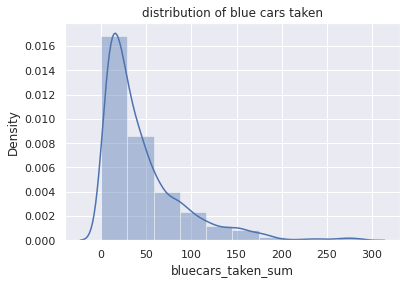

In [143]:
# Plot bluecars taken
sns.distplot(df2['bluecars_taken_sum'], bins=10)
plt.title('distribution of blue cars taken')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'distribution of blue cars returned')

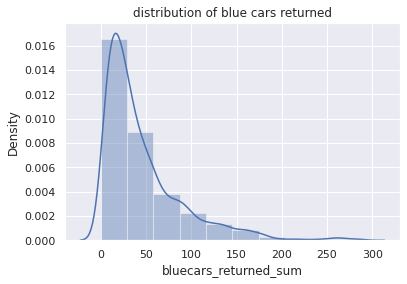

In [144]:
# Plot bluecars returned 
sns.distplot(df2['bluecars_returned_sum'], bins=10)
plt.title('distribution of blue cars returned')

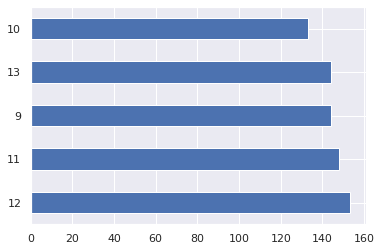

In [145]:
df2['bluecars_returned_sum'].value_counts().head().plot.barh()

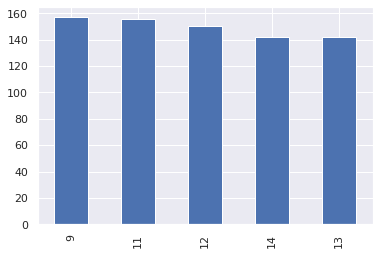

In [146]:
df2['bluecars_taken_sum'].value_counts().head().plot.bar()

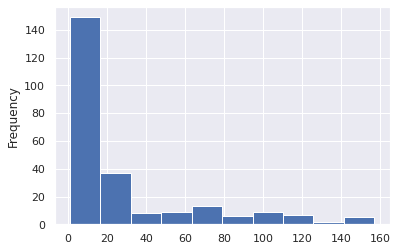

In [147]:
df2['bluecars_taken_sum'].value_counts().sort_index().plot.hist()

In [148]:
df2['postal_code'] = df2['postal_code'].apply(str)
print(df2.dtypes)

postal_code              object
dayofweek                 int64
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [149]:
df2['dayofweek'] = df2['dayofweek'].apply(str)
print(df2.dtypes)

postal_code              object
dayofweek                object
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 3.2 Bivariate analysis

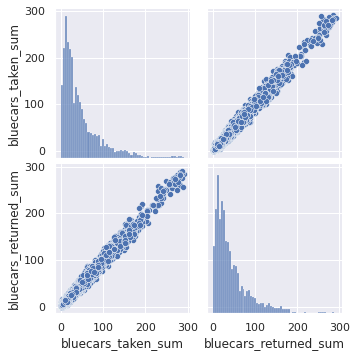

In [150]:
# Ploting the bivariate summaries.
# scatterplot
sns.pairplot(df2)
plt.show()

Text(0.5, 1.0, 'bluecars_taken vs bluecars_returned_sum')

<Figure size 2160x2880 with 0 Axes>

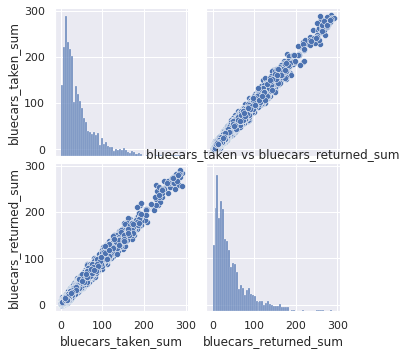

In [204]:
# Determine correlation between numeric features
plt.figure(figsize=(30,40))
sns.pairplot(df2[['bluecars_taken_sum','bluecars_returned_sum']])
plt.title('bluecars_taken vs bluecars_returned_sum')

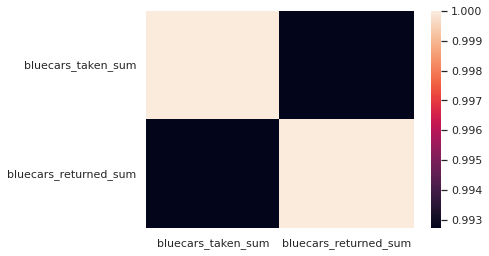

In [160]:
sns.heatmap(df2.corr(),annot=False)
plt.show()

## 3.3 Hypothesis testing

In [153]:
##  Null hypothesis: 
      # the average number of blue cars taken is not different that of the blue cars returned.
##  Alternative hypothesis:  
      # the average number of blue cars taken is different that of the blue cars returned.

In [154]:
df2.columns

Index(['postal_code', 'dayofweek', 'day_type', 'bluecars_taken_sum',
       'bluecars_returned_sum'],
      dtype='object')

In [155]:
df2.dtypes

postal_code              object
dayofweek                object
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object

In [156]:
df2.drop(['day_type'], axis=1, inplace=False)
df2

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
3899,91330,0,weekday,19,9
3900,91330,1,weekday,10,10
3901,91330,2,weekday,11,13
3903,91330,4,weekday,10,6
3906,91330,0,weekday,3,1
...,...,...,...,...,...
16077,95880,1,weekday,25,25
16078,95880,2,weekday,12,13
16079,95880,3,weekday,15,13
16080,95880,4,weekday,15,10


In [157]:
df2.count()

postal_code              6820
dayofweek                6820
day_type                 6820
bluecars_taken_sum       6820
bluecars_returned_sum    6820
dtype: int64

## 3.4 **stratified sampling**

In [181]:
# Stratified sample
df4 = df2.groupby('dayofweek', group_keys=True).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
df4

postal_code dayofweek day_type  bluecars_taken_sum  \
dayofweek                                                            
0         5455        92150         0  weekday                 162   
          11862       93370         0  weekday                   5   
          11246       93300         0  weekday                  18   
          6148        92210         0  weekday                  82   
          12021       93390         0  weekday                   5   
...                     ...       ...      ...                 ...   
4         7251        92290         4  weekday                  13   
          14039       94150         4  weekday                  26   
          6744        92250         4  weekday                  64   
          11798       93360         4  weekday                  15   
          11530       93350         4  weekday                  14   

                 bluecars_returned_sum  
dayofweek                               
0         5455                     162  
          11862                      5  
          11246                     12  
          6148                      72  
          12021                      3  
...                                ...  
4         7251                      13  
          14039                     26  
          6744                      56  
          11798                     16  
          11530                     14  

[681 rows x 5 columns]

In [182]:
# pop mean
a = df['BlueCars_taken_sum'].mean()
a

125.92695057506994

In [183]:
d = df['BlueCars_returned_sum'].mean()
d

125.912713708424

In [184]:
# sample mean
b = df4['bluecars_taken_sum'].mean()
b

46.12775330396476

In [185]:
e = df4['bluecars_returned_sum'].mean()
e

46.08076358296623

In [186]:
# sample standard deviation
c = df4['bluecars_taken_sum'].std()
c

44.94290308207663

In [187]:
# calculating the z-score
zscore = (b-a) / c
zscore

-1.775568372282772

In [188]:
#calculating the p value
from scipy.stats import norm
pro = stats.norm.cdf(zscore)
pro

0.037902043430431756

In [189]:
#interpretation of the p value
if pro < 0.05:    # alpha value is 0.05 or 5%
   print(" reject null hypothesis")
else:
  print("fail to reject null hypothesis")

 reject null hypothesis


In [190]:
# point estimation
# population.mean() - sample.mean()
# we will use the mean for the blue cars that were taken

df['BlueCars_taken_sum'].mean() - df4['bluecars_taken_sum'].mean()

79.79919727110519

In [191]:
import math
sample_mean = df4['bluecars_taken_sum'].mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = df['BlueCars_taken_sum'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(296))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(25.003847564622237, 67.25165904330728)


In [ ]:
# Stratified sample
df4 = df2.groupby('dayofweek', group_keys=True).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
df4

postal_code dayofweek day_type  bluecars_taken_sum  \
dayofweek                                                            
0         5455        92150         0  weekday                 162   
          11862       93370         0  weekday                   5   
          11246       93300         0  weekday                  18   
          6148        92210         0  weekday                  82   
          12021       93390         0  weekday                   5   
...                     ...       ...      ...                 ...   
4         7251        92290         4  weekday                  13   
          14039       94150         4  weekday                  26   
          6744        92250         4  weekday                  64   
          11798       93360         4  weekday                  15   
          11530       93350         4  weekday                  14   

                 bluecars_returned_sum  
dayofweek                               
0         5455                     162  
          11862                      5  
          11246                     12  
          6148                      72  
          12021                      3  
...                                ...  
4         7251                      13  
          14039                     26  
          6744                      56  
          11798                     16  
          11530                     14  

[681 rows x 5 columns]

In [ ]:
# pop mean
a = df['BlueCars_taken_sum'].mean()
a

125.92695057506994

In [ ]:
d = df['BlueCars_returned_sum'].mean()
d

125.912713708424

In [ ]:
# sample mean
b = df4['bluecars_taken_sum'].mean()
b

46.12775330396476

In [ ]:
e = df4['bluecars_returned_sum'].mean()
e

46.08076358296623

In [ ]:
# sample standard deviation
c = df4['bluecars_taken_sum'].std()
c

44.94290308207663

In [ ]:
# calculating the z-score
zscore = (b-a) / c
zscore

-1.775568372282772

In [ ]:
#calculating the p value
from scipy.stats import norm
pro = stats.norm.cdf(zscore)
pro

0.037902043430431756

In [ ]:
#interpretation of the p value
if pro < 0.05:    # alpha value is 0.05 or 5%
   print(" reject null hypothesis")
else:
  print("fail to reject null hypothesis")

 reject null hypothesis


In [ ]:
# point estimation
# population.mean() - sample.mean()
# we will use the mean for the blue cars that were taken

df['BlueCars_taken_sum'].mean() - df4['bluecars_taken_sum'].mean()

79.79919727110519

In [ ]:
import math
sample_mean = df4['bluecars_taken_sum'].mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = df['BlueCars_taken_sum'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(296))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(25.003847564622237, 67.25165904330728)


# 3.5 **cluster sampling**

<function matplotlib.pyplot.show(*args, **kw)>

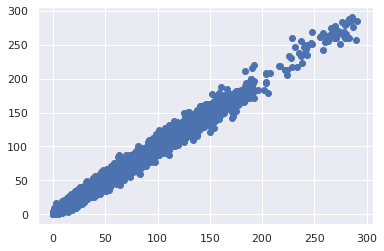

In [195]:
# cluster sampling
plt.scatter(df2['bluecars_taken_sum'],df2['bluecars_returned_sum'])
plt.show

In [201]:
x = df2.iloc[:, 1:7]
x

,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
3899,0,weekday,19,9
3900,1,weekday,10,10
3901,2,weekday,11,13
3903,4,weekday,10,6
3906,0,weekday,3,1
...,...,...,...,...
16077,1,weekday,25,25
16078,2,weekday,12,13
16079,3,weekday,15,13
16080,4,weekday,15,10


# 4.0 **CONCLUSION**

We can not reject the Null hypothesis because there is no sufficient evidence to support the claim the mean of sum of blue cars taken is different from the mean of sum of blue cars returned.